In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Read data - members.csv
member_df = pd.read_csv('C:/IDSDatasets/members_v3.csv')
member_df.head()

,msno,city,bd,gender,registered_via,registration_init_time
0,Rb9UwLQTrxzBVwCB6+bCcSQWZ9JiNLC9dXtM1oEsZA8=,1,0,NaN,11,20110911
1,+tJonkh+O1CA796Fm5X60UMOtB6POHAwPjbTRVl/EuU=,1,0,NaN,7,20110914
2,cV358ssn7a0f7jZOwGNWS07wCKVqxyiImJUX6xcIwKw=,1,0,NaN,11,20110915
3,9bzDeJP6sQodK73K5CBlJ6fgIQzPeLnRl0p5B77XP+g=,1,0,NaN,11,20110915
4,WFLY3s7z4EZsieHCt63XrsdtfTEmJ+2PnnKLH5GY4Tk=,6,32,female,9,20110915


In [4]:
#Check for duplicates msno in members_v2.csv
member_df.duplicated(subset='msno').sum()

0

In [5]:
#Calculate percentage of missing values for each column attribute
member_df.isna().sum() / len(member_df) * 100

msno                       0.000000
city                       0.000000
bd                         0.000000
gender                    65.433528
registered_via             0.000000
registration_init_time     0.000000
dtype: float64

In [6]:
member_df.gender.describe()

count     2339968
unique          2
top          male
freq      1195355
Name: gender, dtype: object

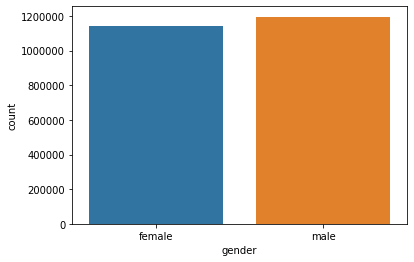

In [7]:
sns.countplot(x='gender', data=member_df)

In [8]:
# dropping gender as it has 65% of missing data
member_df = member_df.drop(columns='gender')

In [9]:
member_df.describe()

,city,bd,registered_via,registration_init_time
count,6.769473e+06,6.769473e+06,6.769473e+06,6.769473e+06
mean,3.847358e+00,9.795794e+00,5.253069e+00,2.014518e+07
std,5.478359e+00,1.792590e+01,2.361398e+00,2.318601e+04
min,1.000000e+00,-7.168000e+03,-1.000000e+00,2.004033e+07
25%,1.000000e+00,0.000000e+00,4.000000e+00,2.014042e+07
50%,1.000000e+00,0.000000e+00,4.000000e+00,2.015101e+07
75%,4.000000e+00,2.100000e+01,7.000000e+00,2.016060e+07
max,2.200000e+01,2.016000e+03,1.900000e+01,2.017043e+07


In [10]:
member_df.bd.value_counts()

 0      4540215
 22      112200
 21      110574
 20      110452
 27      102769
         ...   
 919          1
 920          1
 923          1
 925          1
-5            1
Name: bd, Length: 386, dtype: int64

In [11]:
member_df.bd.value_counts()/ len(member_df) * 100

 0      67.068958
 22      1.657441
 21      1.633421
 20      1.631619
 27      1.518124
          ...    
 919     0.000015
 920     0.000015
 923     0.000015
 925     0.000015
-5       0.000015
Name: bd, Length: 386, dtype: float64

{'whiskers': [<matplotlib.lines.Line2D at 0x1eb8356bb88>,
 'caps': [<matplotlib.lines.Line2D at 0x1eb83580f08>,
 'boxes': [<matplotlib.lines.Line2D at 0x1eb800591c8>],
 'medians': [<matplotlib.lines.Line2D at 0x1eb83586f08>],
 'fliers': [<matplotlib.lines.Line2D at 0x1eb83586f88>],
 'means': []}

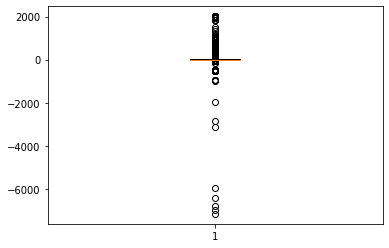

In [13]:
plt.ion()
plt.boxplot(member_df['bd'])

In [14]:
# attribute "bd" is having more than 65% values as incorrect, hence dropping this column
member_df = member_df.drop(columns='bd')

In [15]:
member_df.describe()

,city,registered_via,registration_init_time
count,6.769473e+06,6.769473e+06,6.769473e+06
mean,3.847358e+00,5.253069e+00,2.014518e+07
std,5.478359e+00,2.361398e+00,2.318601e+04
min,1.000000e+00,-1.000000e+00,2.004033e+07
25%,1.000000e+00,4.000000e+00,2.014042e+07
50%,1.000000e+00,4.000000e+00,2.015101e+07
75%,4.000000e+00,7.000000e+00,2.016060e+07
max,2.200000e+01,1.900000e+01,2.017043e+07


In [16]:
member_df.count()

msno                      6769473
city                      6769473
registered_via            6769473
registration_init_time    6769473
dtype: int64

In [17]:
# Read data - user_logs.csv
user_logs_df = pd.read_csv('C:/IDSDatasets/data/churn_comp_refresh/user_logs_v2.csv')
user_logs_df.head()

,msno,date,num_25,num_50,num_75,num_985,num_100,num_unq,total_secs
0,u9E91QDTvHLq6NXjEaWv8u4QIqhrHk72kE+w31Gnhdg=,20170331,8,4,0,1,21,18,6309.273
1,nTeWW/eOZA/UHKdD5L7DEqKKFTjaAj3ALLPoAWsU8n0=,20170330,2,2,1,0,9,11,2390.699
2,2UqkWXwZbIjs03dHLU9KHJNNEvEkZVzm69f3jCS+uLI=,20170331,52,3,5,3,84,110,23203.337
3,ycwLc+m2O0a85jSLALtr941AaZt9ai8Qwlg9n0Nql5U=,20170331,176,4,2,2,19,191,7100.454
4,EGcbTofOSOkMmQyN1NMLxHEXJ1yV3t/JdhGwQ9wXjnI=,20170331,2,1,0,1,112,93,28401.558


In [18]:
user_logs_df.describe()

,date,num_25,num_50,num_75,num_985,num_100,num_unq,total_secs
count,1.839636e+07,1.839636e+07,1.839636e+07,1.839636e+07,1.839636e+07,1.839636e+07,1.839636e+07,1.839636e+07
mean,2.017032e+07,6.191401e+00,1.508789e+00,9.413759e-01,1.079905e+00,3.028246e+01,2.903615e+01,7.904814e+03
std,8.916720e+00,1.342827e+01,3.908539e+00,1.924840e+00,3.518409e+00,4.203641e+01,3.219866e+01,1.013632e+04
min,2.017030e+07,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e-03
25%,2.017031e+07,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,7.000000e+00,8.000000e+00,1.959944e+03
50%,2.017032e+07,2.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,1.700000e+01,1.800000e+01,4.582990e+03
75%,2.017032e+07,7.000000e+00,2.000000e+00,1.000000e+00,1.000000e+00,3.700000e+01,3.800000e+01,9.848441e+03
max,2.017033e+07,5.639000e+03,9.120000e+02,5.080000e+02,1.561000e+03,4.110700e+04,4.925000e+03,9.194059e+06


In [63]:
#Check for dupliacte msno in user_logs
user_logs_df.duplicated(subset='msno').sum()

17292468

In [19]:
user_logs_df.msno.value_counts()

ifc1dvDCKU2TF87ZLaDdAiw0l77EW8hdpxnN38aUhsk=    31
fiy63+IPpkZRriHfdCGkPVNbdd4bvaID9v98Ye+NaCs=    31
wQdPABa5TqRMh6JWHNqpLmn4d2rvqDsf2/4Devm6TrU=    31
98zS9TX5xD7dSTQREpV++H2pJBtMAx6OOPZJ5kWnpRE=    31
EBu4vz699/gDhkZy9LdQ8ExO1k31j1la6qrA60S7Jn4=    31
                                                ..
cmYqwqQVhgYuqHHYIS9eXWMGFdIXJqFgmcQd6MCU6Q8=     1
eleAZrvX5WWgWeHXqZzVncUH5rLy8Z6SiOxKDqVXf7I=     1
O3bosOLhwKO6/2tou1Dix0muTMuUNkEu0v6Wpmu08EA=     1
tnsAPuSJXWw3hGLbLExyNpFryCq+/VXUCIHcEv5TgnE=     1
GLJvNKVlCxWQqecOJVX+y64avkK/7OqDHvgLIPV4zoo=     1
Name: msno, Length: 1103894, dtype: int64

In [21]:
# Calculate % of missing values for each column attribute
user_logs_df.isna().sum() / len(member_df) * 100

msno          0.0
date          0.0
num_25        0.0
num_50        0.0
num_75        0.0
num_985       0.0
num_100       0.0
num_unq       0.0
total_secs    0.0
dtype: float64

In [23]:
#Convert String to Date in "date" column
user_logs_df['date']=pd.to_datetime(user_logs_df['date'], format='%Y%m%d')

In [25]:
user_logs_df.date.head(6)

0   2017-03-31
1   2017-03-30
2   2017-03-31
3   2017-03-31
4   2017-03-31
5   2017-03-31
Name: date, dtype: datetime64[ns]

In [30]:
from datetime import datetime
todaydate = datetime.today().strftime('%Y-%m-%d')
todaydate

'2021-02-27'

In [36]:
#Check whether date is later than current date
user_logs_date_df = user_logs_df.date > todaydate

In [35]:
user_logs_date_df.describe()

count     18396362
unique           1
top          False
freq      18396362
Name: date, dtype: object

In [37]:
# Read data - transactions_v2.csv
transactions_df = pd.read_csv('C:/IDSDatasets/data/churn_comp_refresh/transactions_v2.csv')
transactions_df.head()

,msno,payment_method_id,payment_plan_days,plan_list_price,actual_amount_paid,is_auto_renew,transaction_date,membership_expire_date,is_cancel
0,++6eU4LsQ3UQ20ILS7d99XK8WbiVgbyYL4FUgzZR134=,32,90,298,298,0,20170131,20170504,0
1,++lvGPJOinuin/8esghpnqdljm6NXS8m8Zwchc7gOeA=,41,30,149,149,1,20150809,20190412,0
2,+/GXNtXWQVfKrEDqYAzcSw2xSPYMKWNj22m+5XkVQZc=,36,30,180,180,1,20170303,20170422,0
3,+/w1UrZwyka4C9oNH3+Q8fUf3fD8R3EwWrx57ODIsqk=,36,30,180,180,1,20170329,20170331,1
4,+00PGzKTYqtnb65mPKPyeHXcZEwqiEzktpQksaaSC3c=,41,30,99,99,1,20170323,20170423,0


In [60]:
#Check for duplicate msno in transactions_v2.csv
transactions_df.duplicated(subset='msno').sum()

233959

In [61]:
#Check for null values for "msno" in transactions_v2.csv
transactions_df.isna().sum() / len(transactions_df) * 100

msno                      0.0
payment_method_id         0.0
payment_plan_days         0.0
plan_list_price           0.0
actual_amount_paid        0.0
is_auto_renew             0.0
transaction_date          0.0
membership_expire_date    0.0
is_cancel                 0.0
dtype: float64

In [40]:
#Convert String to Date in "transaction_date" column
transactions_df['transaction_date']=pd.to_datetime(transactions_df['transaction_date'], format='%Y%m%d')
transactions_df

,msno,payment_method_id,payment_plan_days,plan_list_price,actual_amount_paid,is_auto_renew,transaction_date,membership_expire_date,is_cancel
0,++6eU4LsQ3UQ20ILS7d99XK8WbiVgbyYL4FUgzZR134=,32,90,298,298,0,2017-01-31,20170504,0
1,++lvGPJOinuin/8esghpnqdljm6NXS8m8Zwchc7gOeA=,41,30,149,149,1,2015-08-09,20190412,0
2,+/GXNtXWQVfKrEDqYAzcSw2xSPYMKWNj22m+5XkVQZc=,36,30,180,180,1,2017-03-03,20170422,0
3,+/w1UrZwyka4C9oNH3+Q8fUf3fD8R3EwWrx57ODIsqk=,36,30,180,180,1,2017-03-29,20170331,1
4,+00PGzKTYqtnb65mPKPyeHXcZEwqiEzktpQksaaSC3c=,41,30,99,99,1,2017-03-23,20170423,0
...,...,...,...,...,...,...,...,...,...
1431004,zwF50wwaJI2TBKWhB42HRBJ6EQK0jgSo1Xmwb9Jq3SU=,32,180,536,536,0,2017-02-15,20170817,0
1431005,zx/h5MzQQmsSat04wSfGpHp6N8aWLLwM1+7OV7ujmPY=,41,30,149,149,1,2017-03-06,20170406,0
1431006,zxvgjIKjy18Fm+cIWUfYKr68z09+ILBxuMW0DnbeUZ8=,41,30,99,99,1,2017-03-08,20170408,0
1431007,zzNhkExbpzmpjp9tXefiCUBtgNLgS+vZE7fFfTRDJVc=,38,30,149,149,0,2017-03-18,20170417,0


In [41]:
#Convert String to Date in "membership_expire_date" column
transactions_df['membership_expire_date']=pd.to_datetime(transactions_df['membership_expire_date'], format='%Y%m%d')
transactions_df

,msno,payment_method_id,payment_plan_days,plan_list_price,actual_amount_paid,is_auto_renew,transaction_date,membership_expire_date,is_cancel
0,++6eU4LsQ3UQ20ILS7d99XK8WbiVgbyYL4FUgzZR134=,32,90,298,298,0,2017-01-31,2017-05-04,0
1,++lvGPJOinuin/8esghpnqdljm6NXS8m8Zwchc7gOeA=,41,30,149,149,1,2015-08-09,2019-04-12,0
2,+/GXNtXWQVfKrEDqYAzcSw2xSPYMKWNj22m+5XkVQZc=,36,30,180,180,1,2017-03-03,2017-04-22,0
3,+/w1UrZwyka4C9oNH3+Q8fUf3fD8R3EwWrx57ODIsqk=,36,30,180,180,1,2017-03-29,2017-03-31,1
4,+00PGzKTYqtnb65mPKPyeHXcZEwqiEzktpQksaaSC3c=,41,30,99,99,1,2017-03-23,2017-04-23,0
...,...,...,...,...,...,...,...,...,...
1431004,zwF50wwaJI2TBKWhB42HRBJ6EQK0jgSo1Xmwb9Jq3SU=,32,180,536,536,0,2017-02-15,2017-08-17,0
1431005,zx/h5MzQQmsSat04wSfGpHp6N8aWLLwM1+7OV7ujmPY=,41,30,149,149,1,2017-03-06,2017-04-06,0
1431006,zxvgjIKjy18Fm+cIWUfYKr68z09+ILBxuMW0DnbeUZ8=,41,30,99,99,1,2017-03-08,2017-04-08,0
1431007,zzNhkExbpzmpjp9tXefiCUBtgNLgS+vZE7fFfTRDJVc=,38,30,149,149,0,2017-03-18,2017-04-17,0


In [53]:
from datetime import timedelta
#Check sum of transaction_date & payment_plan_days is equal to membership_expire_date
transactions_date_df = (transactions_df['transaction_date'] + transactions_df['payment_plan_days'].map(timedelta)) == transactions_df['membership_expire_date']

In [67]:
transactions_date_df.describe()

count     1431009
unique          2
top         False
freq      1025106
dtype: object

In [66]:
transactions_date_df.head(6)

0    False
1    False
2    False
3    False
4    False
5    False
dtype: bool

In [68]:
#Check result values for transaction date comparison with membership expirydate
transactions_date_df.value_counts()

False    1025106
True      405903
dtype: int64

In [69]:
# Read data - transactions_v2.csv
train_df = pd.read_csv('C:/IDSDatasets/data/churn_comp_refresh/train_v2.csv')
train_df.head()

,msno,is_churn
0,ugx0CjOMzazClkFzU2xasmDZaoIqOUAZPsH1q0teWCg=,1
1,f/NmvEzHfhINFEYZTR05prUdr+E+3+oewvweYz9cCQE=,1
2,zLo9f73nGGT1p21ltZC3ChiRnAVvgibMyazbCxvWPcg=,1
3,8iF/+8HY8lJKFrTc7iR9ZYGCG2Ecrogbc2Vy5YhsfhQ=,1
4,K6fja4+jmoZ5xG6BypqX80Uw/XKpMgrEMdG2edFOxnA=,1


In [70]:
train_df.duplicated(subset='msno').sum()

0

In [71]:
train_df.isna().sum() / len(train_df) * 100

msno        0.0
is_churn    0.0
dtype: float64